# Graficos Dashboard

**Manuel Rocamora Valenti**

En este cuadrerno, vamos a crear una serie de graficos exploratorios de interés para el equipo de dentistas del master.

Con estos gráficos, el **objetivo principal** es que de un vistazo se puedan hacer una idea de la situación, cantidad y organización de las intervenciones realizadas en el master.






Graficos a realizar:

- Relacionar la patalogia con la medicación (Importantes para los paciente)
- Duracion intervenciones en los años
- Información de paciente (Años, genero)

## 1. Carga y arreglo de datos

Cargamos los datos y valoramos algunas transformaciones

In [15]:
import pandas as pd

# Using read_excel to read an Excel file
data = pd.read_excel("datos_APP.xlsx", index_col=0)

# Display the first few rows of the dataframe
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'datos_APP.xlsx'

Pues bien, de momento no vemos la necesidad de realizar ninguna transformación, por lo que vamos a comenzar con los gráficos.

De necesitar alguna transformación, las haremos en cada apartado dedicado a los gráficos

## 2. Graficos

Comencemos con los gráficos

### 2.1 Intervenciones Quirurgicas

#### Histogramas de duraciones de las intervenciones

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, IntRangeSlider
from datetime import datetime

# ... Asegúrate de que 'data' ya está definido y contiene las columnas apropiadas ...

# Convertir la columna de duración a tipo categórico con orden específico
data['Duración.de.la.intervención.quirúrgica'] = pd.Categorical(
    data['Duración.de.la.intervención.quirúrgica'],
    categories=[
        '0-5 minutos', '5-10 minutos', '10-20 minutos', '20-40 minutos', '40-60 minutos',
        '60-90 minutos', '90-120 minutos', '120-180 minutos', '>180 minutos'
    ],
    ordered=True
)

# Convertir la columna de fecha a datetime
data['Fecha.Intervención'] = pd.to_datetime(data['Fecha.Intervención'])

def update_chart(year_range):
    start_year, end_year = year_range
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year, 12, 31)

    mask = (data['Fecha.Intervención'] >= start_date) & (data['Fecha.Intervención'] <= end_date)
    filtered_data = data.loc[mask]

    data_count = filtered_data['Duración.de.la.intervención.quirúrgica'].value_counts().sort_index()

    plot_data = pd.DataFrame({
        'Duración.de.la.intervención.quirúrgica': data_count.index,
        'Frecuencia': data_count.values
    })

    custom_colors = ['#020659', '#4393D9', '#5BA9D9', '#72CEF2', '#1F50B6', '#334CE2']

    fig = px.bar(
        plot_data,
        x='Duración.de.la.intervención.quirúrgica',
        y='Frecuencia',
        title='Distribución de Duraciones de Intervenciones Quirúrgicas',
        labels={'Duración.de.la.intervención.quirúrgica': 'Duración de la Intervención', 'Frecuencia': 'Frecuencia'},
        color='Duración.de.la.intervención.quirúrgica',
        color_discrete_sequence=custom_colors
    )

    fig.update_layout(xaxis_title='Duración de la Intervención', yaxis_title='Frecuencia')
    fig.show()

# Crear un IntRangeSlider para seleccionar el rango de años
year_slider = IntRangeSlider(
    value=[data['Fecha.Intervención'].dt.year.min(), data['Fecha.Intervención'].dt.year.max()],
    min=data['Fecha.Intervención'].dt.year.min(),
    max=data['Fecha.Intervención'].dt.year.max(),
    step=1,
    description='Año Rango:',
    continuous_update=False
)

# Utilizar interact junto con el IntRangeSlider
interact(update_chart, year_range=year_slider)


In [ ]:
# Gráficos p

### 2.2 Pacientes

Información detallada de cada paciente, incluyendo historial médico y diagnósticos.

In [ ]:
import pandas as pd

data = pd.read_csv('Datos/General_data.csv')

data.head()

/var/folders/st/jjkf9ymj499b718tlxyzmp380000gn/T/ipykernel_81547/3311503084.py:3: DtypeWarning:

Columns (13,24,34,38,39,43,53,54,65,77,82,87,89,92,93,98,99,108,112,113,115,116,124,125,128,131,134,137,140,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,236,237,244,245,246,247,251,258,267,268,273,274,278,285,292,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,318,325,332,339,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Operador,...,Amoxicilina 500 mg,Amoxicilina/Ácido Clavulánico 1000/125 mg,Metronidazol 250 mg,Ibuprofeno 400 mg,Ibuprofeno 20 mg/ml,Dexketoprofeno 25 mg,Diclofenaco 50 mg,Paracetamol 500 mg,Paracetamol 100 mg/ml,Otro (especifique).5
0,6.962042e+09,166180500.0,11/26/2018 11:42:28 AM,11/26/2018 12:37:25 PM,83.50.30.214,NaN,NaN,NaN,NaN,Ana Juiz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.962030e+09,166180500.0,11/26/2018 11:36:01 AM,11/26/2018 11:38:40 AM,83.50.30.214,NaN,NaN,NaN,NaN,Ana Juiz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.962029e+09,166180500.0,11/26/2018 11:31:09 AM,11/26/2018 11:35:34 AM,83.50.30.214,NaN,NaN,NaN,NaN,Ana Juiz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Metilprednisolona 16 mg V.O: 2 días 1/8h, 2 dí..."
3,6.962029e+09,166180500.0,11/26/2018 11:27:49 AM,11/26/2018 11:31:03 AM,83.50.30.214,NaN,NaN,NaN,NaN,Ana Juiz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.962028e+09,166180500.0,11/26/2018 11:25:58 AM,11/26/2018 11:27:44 AM,83.50.30.214,NaN,NaN,NaN,NaN,Ana Juiz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columnas = data.columns.tolist()
for i in columnas:
    print(i)

respondent_id
collector_id
date_created
date_modified
ip_address
email_address
first_name
last_name
custom_1
Operador
Auxiliar
Jefe de Día
Fecha Intervención
Número Historia Clínica
Fecha de Nacimiento
Género
Patología Sistémica
Medicación Actual
Tabaco (especificar n° cigarrillos en caso de fumador o exfumador)
Exfumador/a
Fumador/a
Número de cigarrillos/día
Alcohol
Otras Drogas
Patología Sistémica (puede marcar más de una opción)
Hipertensión Arterial
Hipercolesterolemia
Insuficiencia Cardíaca
Angina de Pecho
Infarto de Miocardio
Arritmia
Accidente Vascular Cerebral
Hipotensión Arterial
Anemia Ferropénica
Trastornos Coagulación
Trastornos Agregación Plaquetar
Úlcera Gastroduodenal
Gastritis
Colitis
Cirrosis
Sinusitis
Bronquitis
Asma
Insuficiencia respiratoria
Vértigo
Ansiedad
Depresión
Epilepsia
Diabetes I
Diabetes II
Hipotiroidismo
Hipertiroidismo
Insuficiencia renal
Litiasis renal
Diàlisis
Artritis
Artrosis
Osteoporosis
Gota
Neoplasia
Trasplante
Quimioterapia
Radioterapia
VIH
Hepat

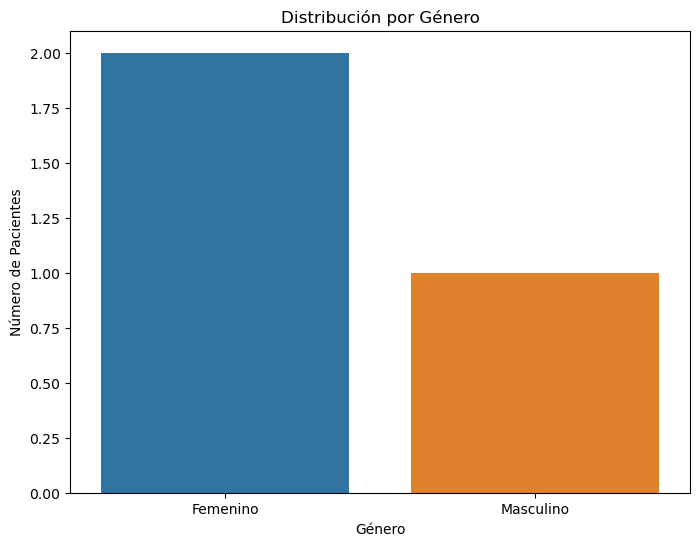

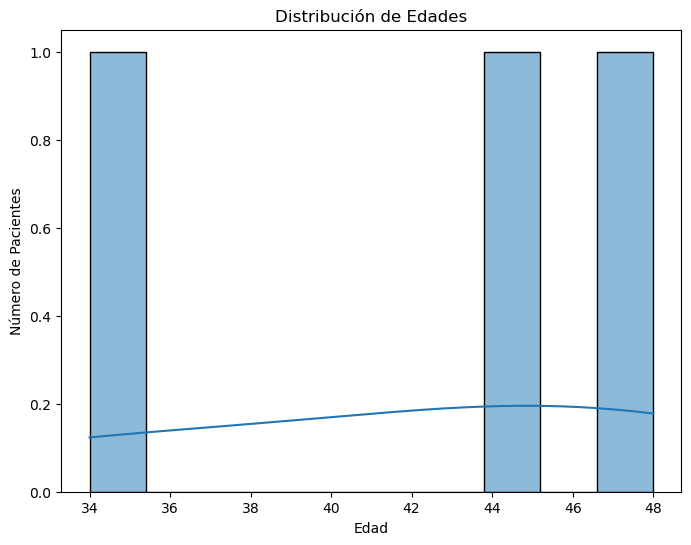

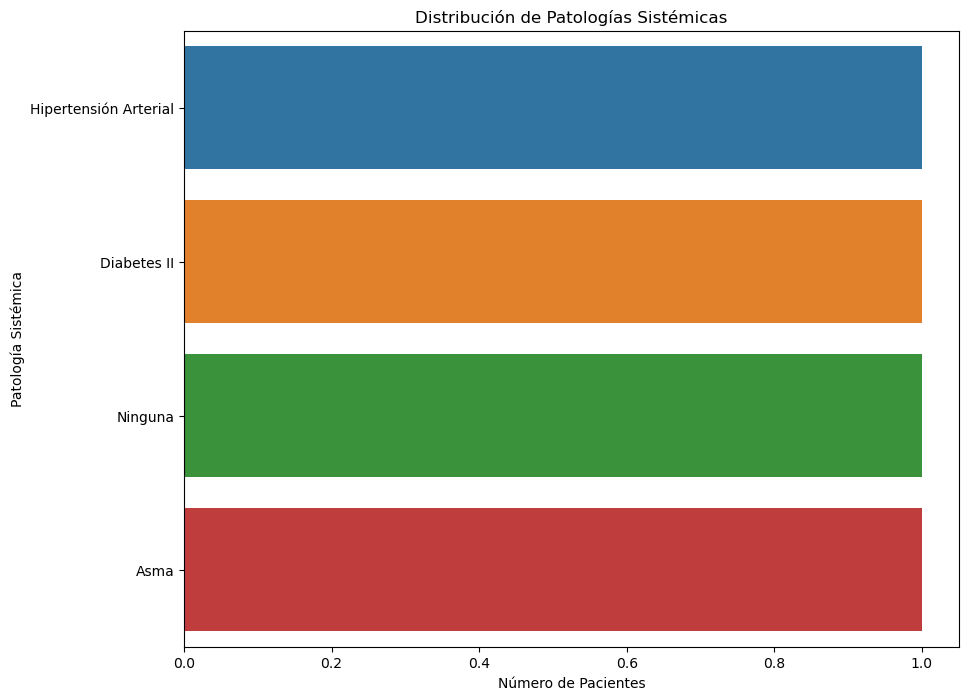

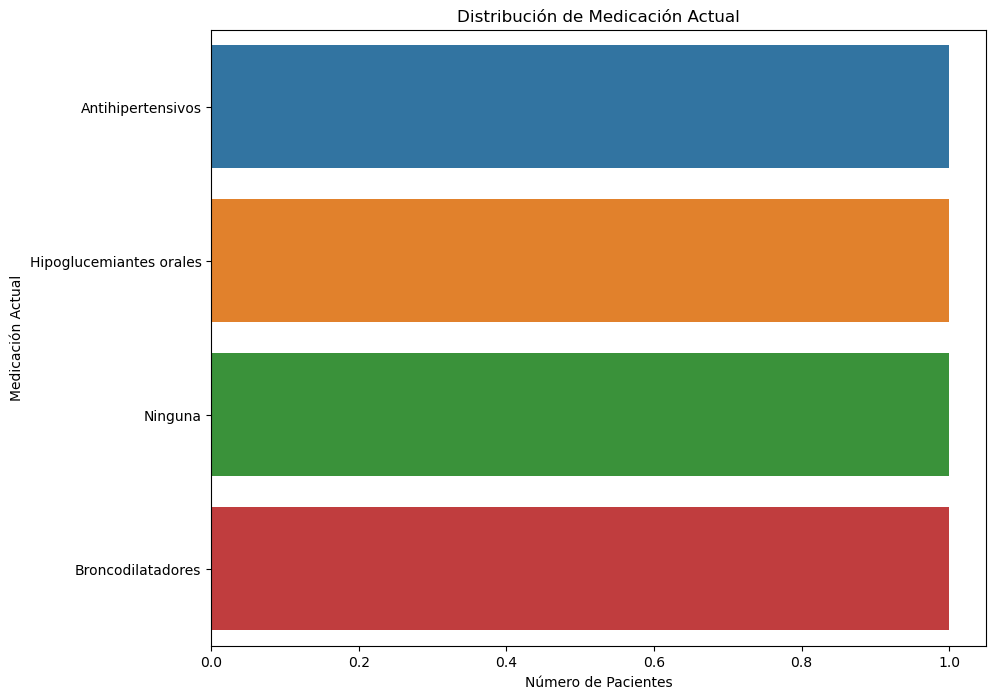

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que los datos están en un diccionario o se leen de un archivo CSV
data = {
    'respondent_id': [1, 2, 3],
    'Género': ['Femenino', 'Masculino', 'Femenino'],
    'Fecha de Nacimiento': ['1980-01-01', '1975-06-15', '1990-03-20'],
    'Patología Sistémica': ['Hipertensión Arterial, Diabetes II', 'Ninguna', 'Asma'],
    'Medicación Actual': ['Antihipertensivos, Hipoglucemiantes orales', 'Ninguna', 'Broncodilatadores']
    # Añade más columnas y datos según sea necesario
}

df = pd.DataFrame(data)

# Convertir 'Fecha de Nacimiento' a datetime y calcular la edad
df['Fecha de Nacimiento'] = pd.to_datetime(df['Fecha de Nacimiento'])
df['Edad'] = (pd.to_datetime('today') - df['Fecha de Nacimiento']).dt.days // 365

# Gráfico de distribución por género
plt.figure(figsize=(8, 6))
sns.countplot(x='Género', data=df)
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Número de Pacientes')
plt.show()

# Gráfico de distribución de edades
plt.figure(figsize=(8, 6))
sns.histplot(df['Edad'], bins=10, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Número de Pacientes')
plt.show()

# Gráfico de patologías sistémicas (separando las múltiples patologías en una lista)
patologias = df['Patología Sistémica'].str.split(', ').explode()
plt.figure(figsize=(10, 8))
sns.countplot(y=patologias, order=patologias.value_counts().index)
plt.title('Distribución de Patologías Sistémicas')
plt.xlabel('Número de Pacientes')
plt.ylabel('Patología Sistémica')
plt.show()

# Gráfico de medicación actual (separando las múltiples medicaciones en una lista)
medicaciones = df['Medicación Actual'].str.split(', ').explode()
plt.figure(figsize=(10, 8))
sns.countplot(y=medicaciones, order=medicaciones.value_counts().index)
plt.title('Distribución de Medicación Actual')
plt.xlabel('Número de Pacientes')
plt.ylabel('Medicación Actual')
plt.show()
